# Remove irrelevant parts of the image

This notebook loads an image from the cell dataset and removes all the parts of the image that are not relevant for the cell detection. The idea behind the code is that every image in the dataset shows a circular well centered in the middle with approximately the same zoom settings. The code leverages this information by first finding the the contour of the well and then fitting a circle to the points generated by the edges of the well.

In [25]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Display image
def imageShow(image):
  plt.imshow(image)
  plt.axis('off')
  plt.show()

In [31]:
# Function to remove the background and keep only the circular well
def remove_background(image_path):

  # Load the image
  image = cv2.imread(image_path)

  # Convert the image to grayscale
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # Find the edges of the grayscale image
  # (This image is just to understand how the Hough Circle Transform works.)
  edges = cv2.Canny(gray, threshold1=80, threshold2=180)

  # Use the Hough Circle Transform to detect the circular well
  circles = cv2.HoughCircles(
                  gray,
                  cv2.HOUGH_GRADIENT,
                  dp=1,
                  minDist = 100,
                  param1 = 180,
                  param2 = 30,
                  minRadius = 100,
                  maxRadius = np.round(gray.shape[0]/2).astype('int')
                )

  # Ensure that circles were detected
  if circles is not None:
      # Round the coordinates and radius to integers
      circles = np.round(circles[0, :]).astype('int')

      # Create a mask with a black background
      mask = np.zeros_like(gray)

      # Draw the detected circle on the mask
      for (x, y, r) in circles:
          cv2.circle(mask, (x, y), r, 255, -1)

      # Use the mask to extract the circular well
      result = cv2.bitwise_and(image, image, mask=mask)

      # Save results
      cv2.imwrite("output.TIF", result)
      cv2.imwrite("edges.TIF", edges)

      # Show results
      imageShow(image)
      #imageShow(edges)
      imageShow(result)

  else:
      print("No circular well was detected in the image.")

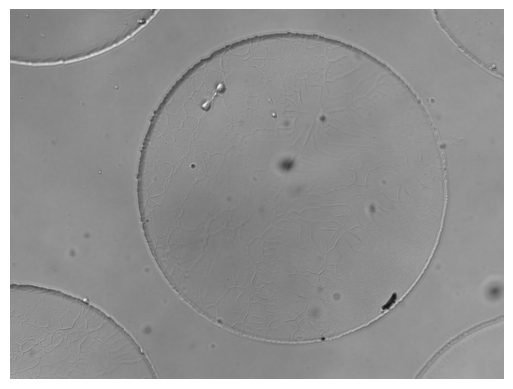

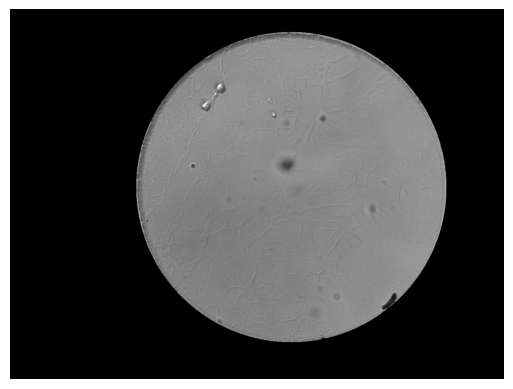

In [32]:
# Replace 'image_path' with the path to your image
imageInput_path = "drive/MyDrive/Cell-project/img1_B03_01_t002.TIF"
remove_background(imageInput_path)